In [9]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans
import time

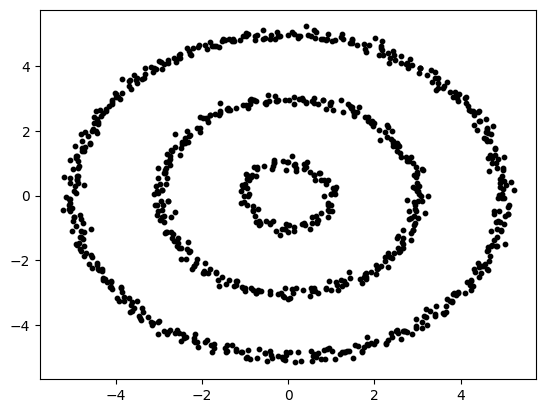

In [10]:
circle = lambda x, y, stddev, radius, n_samples: [
    (
        x + radius * math.cos(2 * math.pi * i / n_samples) + np.random.normal(0, stddev),
        y + radius * math.sin(2 * math.pi * i / n_samples) + np.random.normal(0, stddev)
    )
    for i in range(n_samples)
]

circles_dataset = sum((circle(0, 0, 0.1, radius, radius * 100) for radius in [1, 3, 5]), start=[])
plt.scatter(*zip(*circles_dataset), s=10, color='black')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


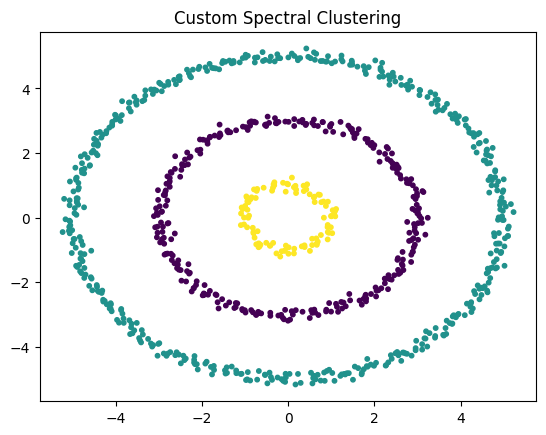

KMeans(n_clusters=3)

In [11]:
def custom_spectral_clustering(data, n_clusters, n_neighbors):
    
    #calculates distance of all points from each other
    distances = np.zeros((len(data), len(data)))
    for i in range(len(data)):
        for j in range(len(data)):
            if i!= j:
                distances[i, j] = np.sqrt((data[i][0] - data[j][0])**2 + (data[i][1] - data[j][1])**2)

    #selects the closest k connections to each point 
    knn = np.argsort(distances, axis=1)[:, 1:n_neighbors+1]
    
    #creates adjacency matrix using k nearest neighbors
    W = np.zeros((len(data), len(data)))
    for i in range(len(data)):
        W[i, knn[i,]] = 1

    #creates graph laplacian
    L = -W
    for i in range(len(data)):
        L[i, i] = -np.sum(L[i, ])

    #U is a matrix where columns are the eigenvectors corresponding to the k smallest eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(L)
    U = eigenvectors[:, np.argsort(eigenvalues)[:n_clusters]]

    #runs kmeans on the eigenvectors and clusters points
    kmeans = KMeans(n_clusters)
    clusters = kmeans.fit(np.asarray(U))
    cluster_assignments = kmeans.labels_
    plt.scatter(*zip(*data), c=cluster_assignments, s= 10)
    plt.title("Custom Spectral Clustering")
    plt.show()
    return clusters

custom_spectral_clustering(circles_dataset, 3, 20)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


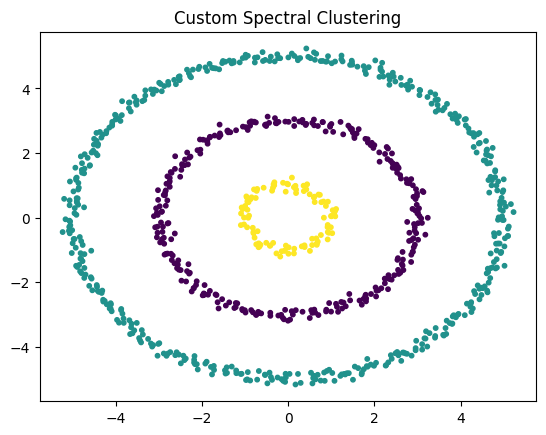

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


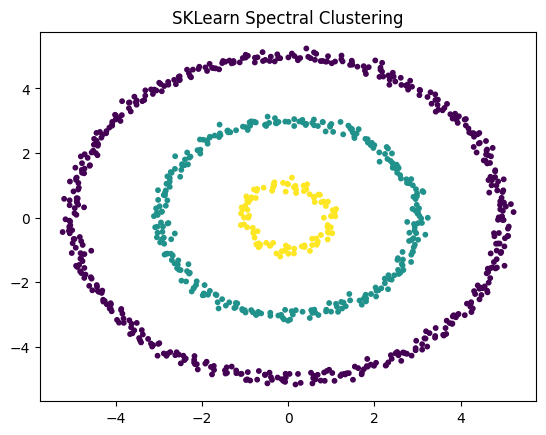

Custom Spectral Clustering Runtime: 2.9628944396972656
Sklearn Spectral Clustering Runtime: 0.9261398315429688


In [12]:
n_clusters = 3
n_neighbors = 20

start_time = time.time()
custom_clusters = custom_spectral_clustering(circles_dataset, n_clusters, n_neighbors)
custom_runtime = time.time() - start_time

start_time = time.time()
skl_clusters = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=n_neighbors)
clusters = skl_clusters.fit_predict(circles_dataset)
plt.scatter(*zip(*circles_dataset), c=clusters, cmap='viridis', s =10)
plt.title("SKLearn Spectral Clustering")
plt.show()
skl_runtime = time.time() - start_time

print("Custom Spectral Clustering Runtime:", custom_runtime)
print("Sklearn Spectral Clustering Runtime:", skl_runtime)